# Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
np.random.seed(1)
tf.random.set_seed(1)

# Data Load

In [2]:
df_ncr_stock=pd.read_csv("C:/Users/mssur/Downloads/NCR.csv")

In [3]:
df_ncr_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df_ncr_stock['Close'].isna().sum()

0

In [5]:
df_ncr = df_ncr_stock[['Close']] # watch the spaces in the column name 

In [6]:
row_count = df_ncr.shape[0] # store the number of obersvations (daily temperature readings)
row_count

99

In [7]:
df_stock = df_ncr.to_numpy() # to make things easier, we create a numpy array from our dataframe of temperatures
df_stock.shape

(99, 1)

In [8]:
sequence_length = 10  # here, I create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [9]:
df_stock = df_stock[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
df_stock.shape

(90, 1)

In [10]:
df_stock = df_stock.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
df_stock

array([[23.16    , 23.870001, 23.780001, 23.77    , 23.139999, 23.440001,
        22.59    , 22.889999, 23.27    , 22.84    ],
       [23.219999, 23.41    , 22.639999, 23.35    , 23.41    , 23.629999,
        23.99    , 23.92    , 24.41    , 24.49    ],
       [24.82    , 25.17    , 25.57    , 25.610001, 25.65    , 25.870001,
        25.690001, 26.309999, 26.82    , 26.200001],
       [26.4     , 27.059999, 27.07    , 26.77    , 27.42    , 28.07    ,
        28.450001, 28.389999, 27.610001, 27.74    ],
       [27.559999, 26.66    , 26.459999, 26.93    , 26.82    , 27.450001,
        26.889999, 26.809999, 26.299999, 26.18    ],
       [26.059999, 25.690001, 25.73    , 25.530001, 25.58    , 25.51    ,
        25.780001, 25.049999, 24.59    , 24.58    ],
       [23.52    , 22.6     , 21.610001, 22.030001, 21.540001, 21.629999,
        21.24    , 21.84    , 22.35    , 21.77    ],
       [21.77    , 21.860001, 21.98    , 21.92    , 22.49    , 23.      ,
        23.59    , 23.450001, 23.18  

In [11]:
# we can now see that our days have been organized into rows of sequence length. 

In [12]:
# create our X and y. 
# X will be the 9 days prior...
X = df_stock[:, :-1] # all rows, all columns except the last one
# y will be the 10th day (what we are trying to predict)
y = df_stock[:, -1] # all rows, only the last column

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(6, 9, 1)
(3, 9, 1)


 # Simple RNN with one layer

In [15]:
print(X_train.shape)  # 2d array of shape (n_samples, n_features)
print(X_test.shape)  # 1d array of shape (n_samples,)

(6, 9, 1)
(3, 9, 1)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1

model = Sequential(
    [
        SimpleRNN(64, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=None)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 702.0164 - root_mean_squared_error: 26.4956 - val_loss: 626.4940 - val_root_mean_squared_error: 25.0299
Epoch 2/600
1/1 [==============================] - 0s 55ms/step - loss: 691.7595 - root_mean_squared_error: 26.3013 - val_loss: 619.5489 - val_root_mean_squared_error: 24.8907
Epoch 3/600
1/1 [==============================] - 0s 53ms/step - loss: 684.6511 - root_mean_squared_error: 26.1658 - val_loss: 613.3320 - val_root_mean_squared_error: 24.7655
Epoch 4/600
1/1 [==============================] - 0s 52ms/step - loss: 678.2775 - root_mean_squared_error: 26.0438 - val_loss: 607.3233 - val_root_mean_squared_error: 24.6439
Epoch 5/600
1/1 [==============================] - 0s 49ms/step - loss: 672.1082 - root_mean_squared_error: 25.9251 - val_loss: 601.3347 - val_root_mean_squared_error: 24.5221
Epoch 6/600
1/1 [==============================] - 0s 53ms/step - loss: 665.9506 - root_mean_squared_error: 25.8060 - val_

1/1 [==============================] - 0s 46ms/step - loss: 325.7050 - root_mean_squared_error: 18.0473 - val_loss: 274.0827 - val_root_mean_squared_error: 16.5554
Epoch 48/600
1/1 [==============================] - 0s 45ms/step - loss: 319.6851 - root_mean_squared_error: 17.8797 - val_loss: 268.9354 - val_root_mean_squared_error: 16.3993
Epoch 49/600
1/1 [==============================] - 0s 47ms/step - loss: 314.0647 - root_mean_squared_error: 17.7219 - val_loss: 264.0838 - val_root_mean_squared_error: 16.2507
Epoch 50/600
1/1 [==============================] - 0s 45ms/step - loss: 308.7651 - root_mean_squared_error: 17.5717 - val_loss: 259.4746 - val_root_mean_squared_error: 16.1082
Epoch 51/600
1/1 [==============================] - 0s 48ms/step - loss: 303.7247 - root_mean_squared_error: 17.4277 - val_loss: 255.0524 - val_root_mean_squared_error: 15.9704
Epoch 52/600
1/1 [==============================] - 0s 47ms/step - loss: 298.8861 - root_mean_squared_error: 17.2883 - val_loss:

1/1 [==============================] - 0s 46ms/step - loss: 183.8449 - root_mean_squared_error: 13.5589 - val_loss: 149.6274 - val_root_mean_squared_error: 12.2322
Epoch 94/600
1/1 [==============================] - 0s 47ms/step - loss: 182.3571 - root_mean_squared_error: 13.5040 - val_loss: 148.3103 - val_root_mean_squared_error: 12.1783
Epoch 95/600
1/1 [==============================] - 0s 48ms/step - loss: 180.8898 - root_mean_squared_error: 13.4495 - val_loss: 147.0107 - val_root_mean_squared_error: 12.1248
Epoch 96/600
1/1 [==============================] - 0s 48ms/step - loss: 179.4415 - root_mean_squared_error: 13.3956 - val_loss: 145.7275 - val_root_mean_squared_error: 12.0718
Epoch 97/600
1/1 [==============================] - 0s 44ms/step - loss: 178.0111 - root_mean_squared_error: 13.3421 - val_loss: 144.4598 - val_root_mean_squared_error: 12.0191
Epoch 98/600
1/1 [==============================] - 0s 48ms/step - loss: 176.5976 - root_mean_squared_error: 13.2890 - val_loss:

1/1 [==============================] - 0s 44ms/step - loss: 127.6202 - root_mean_squared_error: 11.2969 - val_loss: 99.9281 - val_root_mean_squared_error: 9.9964
Epoch 140/600
1/1 [==============================] - 0s 49ms/step - loss: 126.5880 - root_mean_squared_error: 11.2511 - val_loss: 99.0241 - val_root_mean_squared_error: 9.9511
Epoch 141/600
1/1 [==============================] - 0s 46ms/step - loss: 125.5622 - root_mean_squared_error: 11.2055 - val_loss: 98.1262 - val_root_mean_squared_error: 9.9059
Epoch 142/600
1/1 [==============================] - 0s 49ms/step - loss: 124.5428 - root_mean_squared_error: 11.1599 - val_loss: 97.2345 - val_root_mean_squared_error: 9.8608
Epoch 143/600
1/1 [==============================] - 0s 47ms/step - loss: 123.5300 - root_mean_squared_error: 11.1144 - val_loss: 96.3489 - val_root_mean_squared_error: 9.8158
Epoch 144/600
1/1 [==============================] - 0s 45ms/step - loss: 122.5235 - root_mean_squared_error: 11.0690 - val_loss: 95.4

Epoch 186/600
1/1 [==============================] - 0s 47ms/step - loss: 85.6959 - root_mean_squared_error: 9.2572 - val_loss: 63.7064 - val_root_mean_squared_error: 7.9816
Epoch 187/600
1/1 [==============================] - 0s 45ms/step - loss: 84.9425 - root_mean_squared_error: 9.2164 - val_loss: 63.0670 - val_root_mean_squared_error: 7.9415
Epoch 188/600
1/1 [==============================] - 0s 44ms/step - loss: 84.1946 - root_mean_squared_error: 9.1758 - val_loss: 62.4328 - val_root_mean_squared_error: 7.9014
Epoch 189/600
1/1 [==============================] - 0s 46ms/step - loss: 83.4521 - root_mean_squared_error: 9.1352 - val_loss: 61.8037 - val_root_mean_squared_error: 7.8615
Epoch 190/600
1/1 [==============================] - 0s 47ms/step - loss: 82.7151 - root_mean_squared_error: 9.0948 - val_loss: 61.1798 - val_root_mean_squared_error: 7.8217
Epoch 191/600
1/1 [==============================] - 0s 45ms/step - loss: 81.9834 - root_mean_squared_error: 9.0545 - val_loss: 60

1/1 [==============================] - 0s 53ms/step - loss: 55.8068 - root_mean_squared_error: 7.4704 - val_loss: 38.8212 - val_root_mean_squared_error: 6.2307
Epoch 234/600
1/1 [==============================] - 0s 53ms/step - loss: 55.2839 - root_mean_squared_error: 7.4353 - val_loss: 38.3968 - val_root_mean_squared_error: 6.1965
Epoch 235/600
1/1 [==============================] - 0s 55ms/step - loss: 54.7654 - root_mean_squared_error: 7.4004 - val_loss: 37.9764 - val_root_mean_squared_error: 6.1625
Epoch 236/600
1/1 [==============================] - 0s 52ms/step - loss: 54.2511 - root_mean_squared_error: 7.3655 - val_loss: 37.5599 - val_root_mean_squared_error: 6.1286
Epoch 237/600
1/1 [==============================] - 0s 53ms/step - loss: 53.7411 - root_mean_squared_error: 7.3308 - val_loss: 37.1474 - val_root_mean_squared_error: 6.0949
Epoch 238/600
1/1 [==============================] - 0s 51ms/step - loss: 53.2353 - root_mean_squared_error: 7.2963 - val_loss: 36.7387 - val_ro

1/1 [==============================] - 0s 54ms/step - loss: 35.4733 - root_mean_squared_error: 5.9559 - val_loss: 22.7573 - val_root_mean_squared_error: 4.7705
Epoch 281/600
1/1 [==============================] - 0s 54ms/step - loss: 35.1257 - root_mean_squared_error: 5.9267 - val_loss: 22.4927 - val_root_mean_squared_error: 4.7426
Epoch 282/600
1/1 [==============================] - 0s 50ms/step - loss: 34.7813 - root_mean_squared_error: 5.8976 - val_loss: 22.2310 - val_root_mean_squared_error: 4.7150
Epoch 283/600
1/1 [==============================] - 0s 53ms/step - loss: 34.4401 - root_mean_squared_error: 5.8686 - val_loss: 21.9720 - val_root_mean_squared_error: 4.6874
Epoch 284/600
1/1 [==============================] - 0s 52ms/step - loss: 34.1019 - root_mean_squared_error: 5.8397 - val_loss: 21.7159 - val_root_mean_squared_error: 4.6600
Epoch 285/600
1/1 [==============================] - 0s 53ms/step - loss: 33.7669 - root_mean_squared_error: 5.8109 - val_loss: 21.4626 - val_ro

1/1 [==============================] - 0s 55ms/step - loss: 22.2140 - root_mean_squared_error: 4.7132 - val_loss: 13.0573 - val_root_mean_squared_error: 3.6135
Epoch 328/600
1/1 [==============================] - 0s 52ms/step - loss: 21.9926 - root_mean_squared_error: 4.6896 - val_loss: 12.9042 - val_root_mean_squared_error: 3.5922
Epoch 329/600
1/1 [==============================] - 0s 54ms/step - loss: 21.7734 - root_mean_squared_error: 4.6662 - val_loss: 12.7531 - val_root_mean_squared_error: 3.5711
Epoch 330/600
1/1 [==============================] - 0s 53ms/step - loss: 21.5564 - root_mean_squared_error: 4.6429 - val_loss: 12.6038 - val_root_mean_squared_error: 3.5502
Epoch 331/600
1/1 [==============================] - 0s 52ms/step - loss: 21.3417 - root_mean_squared_error: 4.6197 - val_loss: 12.4565 - val_root_mean_squared_error: 3.5294
Epoch 332/600
1/1 [==============================] - 0s 51ms/step - loss: 21.1290 - root_mean_squared_error: 4.5966 - val_loss: 12.3110 - val_ro

1/1 [==============================] - 0s 54ms/step - loss: 13.9331 - root_mean_squared_error: 3.7327 - val_loss: 7.6752 - val_root_mean_squared_error: 2.7704
Epoch 375/600
1/1 [==============================] - 0s 53ms/step - loss: 13.7981 - root_mean_squared_error: 3.7146 - val_loss: 7.5952 - val_root_mean_squared_error: 2.7559
Epoch 376/600
1/1 [==============================] - 0s 56ms/step - loss: 13.6646 - root_mean_squared_error: 3.6966 - val_loss: 7.5165 - val_root_mean_squared_error: 2.7416
Epoch 377/600
1/1 [==============================] - 0s 57ms/step - loss: 13.5326 - root_mean_squared_error: 3.6787 - val_loss: 7.4389 - val_root_mean_squared_error: 2.7274
Epoch 378/600
1/1 [==============================] - 0s 51ms/step - loss: 13.4021 - root_mean_squared_error: 3.6609 - val_loss: 7.3625 - val_root_mean_squared_error: 2.7134
Epoch 379/600
1/1 [==============================] - 0s 53ms/step - loss: 13.2730 - root_mean_squared_error: 3.6432 - val_loss: 7.2873 - val_root_mea

1/1 [==============================] - 0s 54ms/step - loss: 8.9857 - root_mean_squared_error: 2.9976 - val_loss: 5.0335 - val_root_mean_squared_error: 2.2436
Epoch 422/600
1/1 [==============================] - 0s 53ms/step - loss: 8.9071 - root_mean_squared_error: 2.9845 - val_loss: 4.9981 - val_root_mean_squared_error: 2.2356
Epoch 423/600
1/1 [==============================] - 0s 53ms/step - loss: 8.8294 - root_mean_squared_error: 2.9714 - val_loss: 4.9633 - val_root_mean_squared_error: 2.2279
Epoch 424/600
1/1 [==============================] - 0s 50ms/step - loss: 8.7526 - root_mean_squared_error: 2.9585 - val_loss: 4.9293 - val_root_mean_squared_error: 2.2202
Epoch 425/600
1/1 [==============================] - 0s 54ms/step - loss: 8.6768 - root_mean_squared_error: 2.9456 - val_loss: 4.8959 - val_root_mean_squared_error: 2.2127
Epoch 426/600
1/1 [==============================] - 0s 51ms/step - loss: 8.6018 - root_mean_squared_error: 2.9329 - val_loss: 4.8632 - val_root_mean_squa

Epoch 469/600
1/1 [==============================] - 0s 55ms/step - loss: 6.1168 - root_mean_squared_error: 2.4732 - val_loss: 3.9881 - val_root_mean_squared_error: 1.9970
Epoch 470/600
1/1 [==============================] - 0s 54ms/step - loss: 6.0735 - root_mean_squared_error: 2.4645 - val_loss: 3.9778 - val_root_mean_squared_error: 1.9944
Epoch 471/600
1/1 [==============================] - 0s 56ms/step - loss: 6.0309 - root_mean_squared_error: 2.4558 - val_loss: 3.9678 - val_root_mean_squared_error: 1.9919
Epoch 472/600
1/1 [==============================] - 0s 53ms/step - loss: 5.9888 - root_mean_squared_error: 2.4472 - val_loss: 3.9582 - val_root_mean_squared_error: 1.9895
Epoch 473/600
1/1 [==============================] - 0s 51ms/step - loss: 5.9472 - root_mean_squared_error: 2.4387 - val_loss: 3.9490 - val_root_mean_squared_error: 1.9872
Epoch 474/600
1/1 [==============================] - 0s 51ms/step - loss: 5.9062 - root_mean_squared_error: 2.4303 - val_loss: 3.9401 - val_

1/1 [==============================] - 0s 56ms/step - loss: 4.5959 - root_mean_squared_error: 2.1438 - val_loss: 3.8162 - val_root_mean_squared_error: 1.9535
Epoch 517/600
1/1 [==============================] - 0s 53ms/step - loss: 4.5729 - root_mean_squared_error: 2.1384 - val_loss: 3.8178 - val_root_mean_squared_error: 1.9539
Epoch 517: early stopping


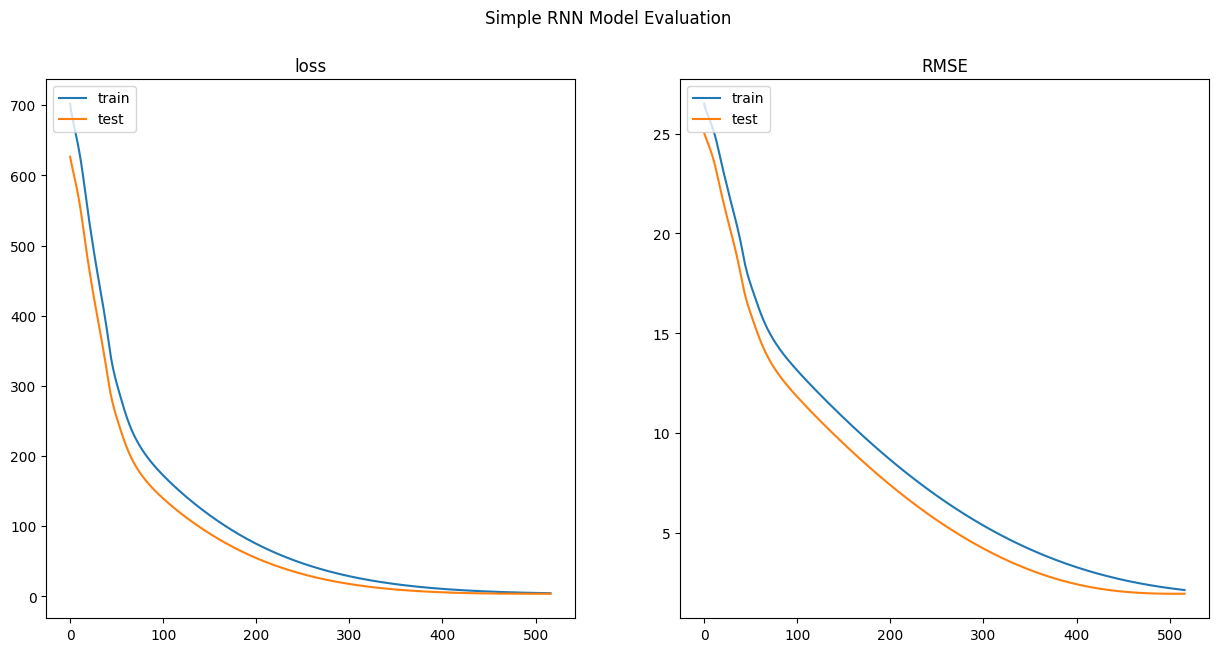

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Simple RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [20]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


1/1 [==============================] - 0s 218ms/step


1.9539275000956868

In [21]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [22]:
model.predict(prior_days) # note the structure of the prediction

1/1 [==============================] - 0s 227ms/step


array([[23.561346]], dtype=float32)

In [23]:
tenthday_stock = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 0s 41ms/step


In [24]:
print(f"Closing price for the 10th day will be {tenthday_stock:.2f} dollars.")

Closing price for the 10th day will be 23.56 dollars.


# Deep RNN

In [25]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [26]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history1 = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 3s 3s/step - loss: 1688.7828 - root_mean_squared_error: 41.0948 - val_loss: 1290.6320 - val_root_mean_squared_error: 35.9254
Epoch 2/600
1/1 [==============================] - 0s 58ms/step - loss: 1447.2018 - root_mean_squared_error: 38.0421 - val_loss: 1165.0688 - val_root_mean_squared_error: 34.1331
Epoch 3/600
1/1 [==============================] - 0s 60ms/step - loss: 1306.7745 - root_mean_squared_error: 36.1493 - val_loss: 1054.1208 - val_root_mean_squared_error: 32.4672
Epoch 4/600
1/1 [==============================] - 0s 65ms/step - loss: 1182.8771 - root_mean_squared_error: 34.3930 - val_loss: 988.7515 - val_root_mean_squared_error: 31.4444
Epoch 5/600
1/1 [==============================] - 0s 61ms/step - loss: 1110.3156 - root_mean_squared_error: 33.3214 - val_loss: 942.1971 - val_root_mean_squared_error: 30.6952
Epoch 6/600
1/1 [==============================] - 0s 59ms/step - loss: 1057.8954 - root_mean_squared_error: 32.52

Epoch 48/600
1/1 [==============================] - 0s 58ms/step - loss: 0.9175 - root_mean_squared_error: 0.9578 - val_loss: 0.6887 - val_root_mean_squared_error: 0.8299
Epoch 49/600
1/1 [==============================] - 0s 56ms/step - loss: 1.1355 - root_mean_squared_error: 1.0656 - val_loss: 0.7847 - val_root_mean_squared_error: 0.8859
Epoch 50/600
1/1 [==============================] - 0s 56ms/step - loss: 1.2549 - root_mean_squared_error: 1.1202 - val_loss: 0.7974 - val_root_mean_squared_error: 0.8930
Epoch 51/600
1/1 [==============================] - 0s 55ms/step - loss: 1.2691 - root_mean_squared_error: 1.1266 - val_loss: 0.7484 - val_root_mean_squared_error: 0.8651
Epoch 52/600
1/1 [==============================] - 0s 57ms/step - loss: 1.2070 - root_mean_squared_error: 1.0986 - val_loss: 0.6652 - val_root_mean_squared_error: 0.8156
Epoch 53/600
1/1 [==============================] - 0s 57ms/step - loss: 1.1027 - root_mean_squared_error: 1.0501 - val_loss: 0.5675 - val_root_m

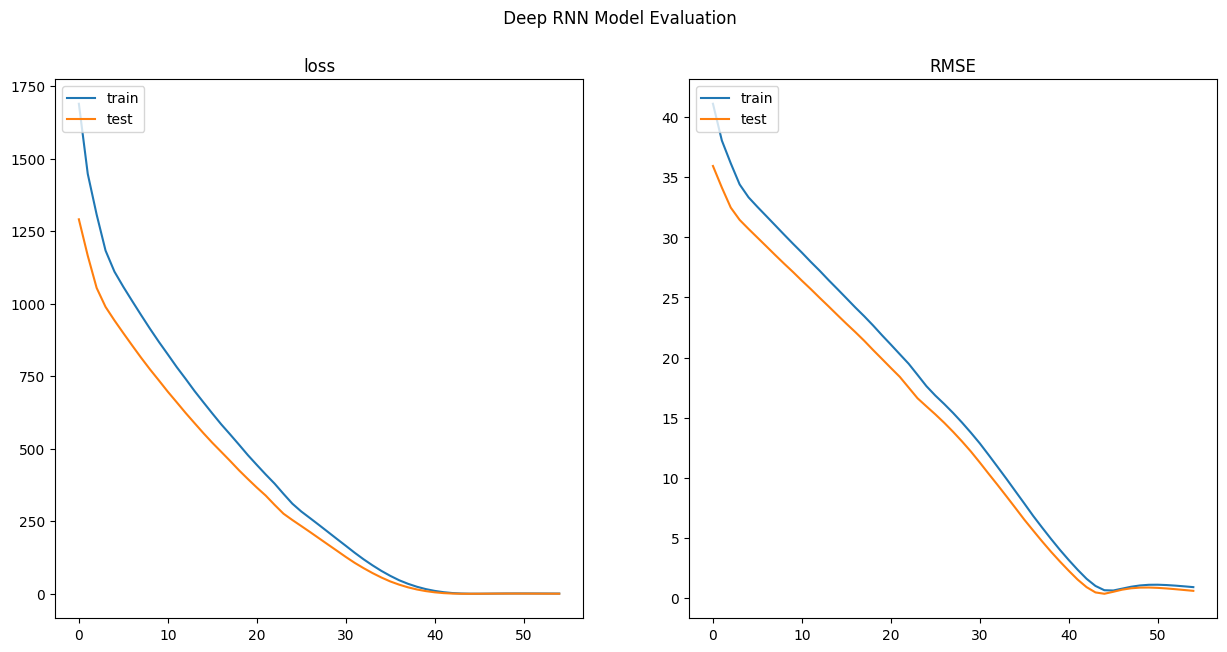

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(' Deep RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history1.history['loss'])
ax1.plot(history1.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history1.history['root_mean_squared_error'])
ax2.plot(history1.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [29]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


1/1 [==============================] - 0s 318ms/step


0.6176489669262625

In [30]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [31]:
model.predict(prior_days) # note the structure of the prediction

1/1 [==============================] - 0s 362ms/step


array([[24.648762]], dtype=float32)

In [32]:
tenthday_stock_deepRNN = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 0s 44ms/step


In [33]:
print(f"Closing price for the 10th day will be  {tenthday_stock_deepRNN:.2f} dollars.")

Closing price for the 10th day will be  24.65 dollars.


# LSTM with One layer

In [34]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [35]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history2 = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 881.2271 - root_mean_squared_error: 29.6855 - val_loss: 768.4429 - val_root_mean_squared_error: 27.7208
Epoch 2/600
1/1 [==============================] - 0s 51ms/step - loss: 853.5176 - root_mean_squared_error: 29.2150 - val_loss: 754.0638 - val_root_mean_squared_error: 27.4602
Epoch 3/600
1/1 [==============================] - 0s 59ms/step - loss: 837.2415 - root_mean_squared_error: 28.9351 - val_loss: 741.9023 - val_root_mean_squared_error: 27.2379
Epoch 4/600
1/1 [==============================] - 0s 61ms/step - loss: 823.5357 - root_mean_squared_error: 28.6973 - val_loss: 730.7726 - val_root_mean_squared_error: 27.0328
Epoch 5/600
1/1 [==============================] - 0s 60ms/step - loss: 811.0515 - root_mean_squared_error: 28.4790 - val_loss: 720.2795 - val_root_mean_squared_error: 26.8380
Epoch 6/600
1/1 [==============================] - 0s 55ms/step - loss: 799.3379 - root_mean_squared_error: 28.2726 - val_

1/1 [==============================] - 0s 57ms/step - loss: 1.6594 - root_mean_squared_error: 1.2882 - val_loss: 3.7744 - val_root_mean_squared_error: 1.9428
Epoch 49/600
1/1 [==============================] - 0s 53ms/step - loss: 1.6039 - root_mean_squared_error: 1.2664 - val_loss: 3.6682 - val_root_mean_squared_error: 1.9153
Epoch 50/600
1/1 [==============================] - 0s 52ms/step - loss: 1.5531 - root_mean_squared_error: 1.2462 - val_loss: 3.5698 - val_root_mean_squared_error: 1.8894
Epoch 51/600
1/1 [==============================] - 0s 55ms/step - loss: 1.5063 - root_mean_squared_error: 1.2273 - val_loss: 3.4778 - val_root_mean_squared_error: 1.8649
Epoch 52/600
1/1 [==============================] - 0s 54ms/step - loss: 1.4629 - root_mean_squared_error: 1.2095 - val_loss: 3.3913 - val_root_mean_squared_error: 1.8416
Epoch 53/600
1/1 [==============================] - 0s 51ms/step - loss: 1.4224 - root_mean_squared_error: 1.1926 - val_loss: 3.3095 - val_root_mean_squared_e

Epoch 96/600
1/1 [==============================] - 0s 51ms/step - loss: 0.4270 - root_mean_squared_error: 0.6535 - val_loss: 1.0409 - val_root_mean_squared_error: 1.0202
Epoch 97/600
1/1 [==============================] - 0s 54ms/step - loss: 0.4096 - root_mean_squared_error: 0.6400 - val_loss: 1.0043 - val_root_mean_squared_error: 1.0022
Epoch 98/600
1/1 [==============================] - 0s 56ms/step - loss: 0.3927 - root_mean_squared_error: 0.6267 - val_loss: 0.9695 - val_root_mean_squared_error: 0.9846
Epoch 99/600
1/1 [==============================] - 0s 53ms/step - loss: 0.3765 - root_mean_squared_error: 0.6136 - val_loss: 0.9365 - val_root_mean_squared_error: 0.9677
Epoch 100/600
1/1 [==============================] - 0s 58ms/step - loss: 0.3611 - root_mean_squared_error: 0.6009 - val_loss: 0.9054 - val_root_mean_squared_error: 0.9515
Epoch 101/600
1/1 [==============================] - 0s 51ms/step - loss: 0.3463 - root_mean_squared_error: 0.5885 - val_loss: 0.8763 - val_root

Epoch 144/600
1/1 [==============================] - 0s 54ms/step - loss: 0.1502 - root_mean_squared_error: 0.3876 - val_loss: 0.4319 - val_root_mean_squared_error: 0.6572
Epoch 145/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1492 - root_mean_squared_error: 0.3862 - val_loss: 0.4281 - val_root_mean_squared_error: 0.6543
Epoch 146/600
1/1 [==============================] - 0s 55ms/step - loss: 0.1481 - root_mean_squared_error: 0.3849 - val_loss: 0.4244 - val_root_mean_squared_error: 0.6515
Epoch 147/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1471 - root_mean_squared_error: 0.3836 - val_loss: 0.4208 - val_root_mean_squared_error: 0.6487
Epoch 148/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1462 - root_mean_squared_error: 0.3823 - val_loss: 0.4173 - val_root_mean_squared_error: 0.6460
Epoch 149/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1453 - root_mean_squared_error: 0.3811 - val_loss: 0.4139 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.1256 - root_mean_squared_error: 0.3543 - val_loss: 0.3319 - val_root_mean_squared_error: 0.5761
Epoch 192/600
1/1 [==============================] - 0s 54ms/step - loss: 0.1253 - root_mean_squared_error: 0.3540 - val_loss: 0.3308 - val_root_mean_squared_error: 0.5752
Epoch 193/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1252 - root_mean_squared_error: 0.3538 - val_loss: 0.3298 - val_root_mean_squared_error: 0.5743
Epoch 194/600
1/1 [==============================] - 0s 54ms/step - loss: 0.1250 - root_mean_squared_error: 0.3535 - val_loss: 0.3288 - val_root_mean_squared_error: 0.5734
Epoch 195/600
1/1 [==============================] - 0s 51ms/step - loss: 0.1248 - root_mean_squared_error: 0.3532 - val_loss: 0.3279 - val_root_mean_squared_error: 0.5726
Epoch 196/600
1/1 [==============================] - 0s 50ms/step - loss: 0.1246 - root_mean_squared_error: 0.3530 - val_loss: 0.3269 - val_root_mean_squa

Epoch 239/600
1/1 [==============================] - 0s 59ms/step - loss: 0.1208 - root_mean_squared_error: 0.3476 - val_loss: 0.2966 - val_root_mean_squared_error: 0.5447
Epoch 240/600
1/1 [==============================] - 0s 53ms/step - loss: 0.1214 - root_mean_squared_error: 0.3484 - val_loss: 0.3085 - val_root_mean_squared_error: 0.5554
Epoch 241/600
1/1 [==============================] - 0s 55ms/step - loss: 0.1227 - root_mean_squared_error: 0.3502 - val_loss: 0.2946 - val_root_mean_squared_error: 0.5428
Epoch 242/600
1/1 [==============================] - 0s 54ms/step - loss: 0.1253 - root_mean_squared_error: 0.3540 - val_loss: 0.3210 - val_root_mean_squared_error: 0.5665
Epoch 243/600
1/1 [==============================] - 0s 56ms/step - loss: 0.1306 - root_mean_squared_error: 0.3614 - val_loss: 0.2984 - val_root_mean_squared_error: 0.5462
Epoch 244/600
1/1 [==============================] - 0s 52ms/step - loss: 0.1417 - root_mean_squared_error: 0.3764 - val_loss: 0.3601 - val_

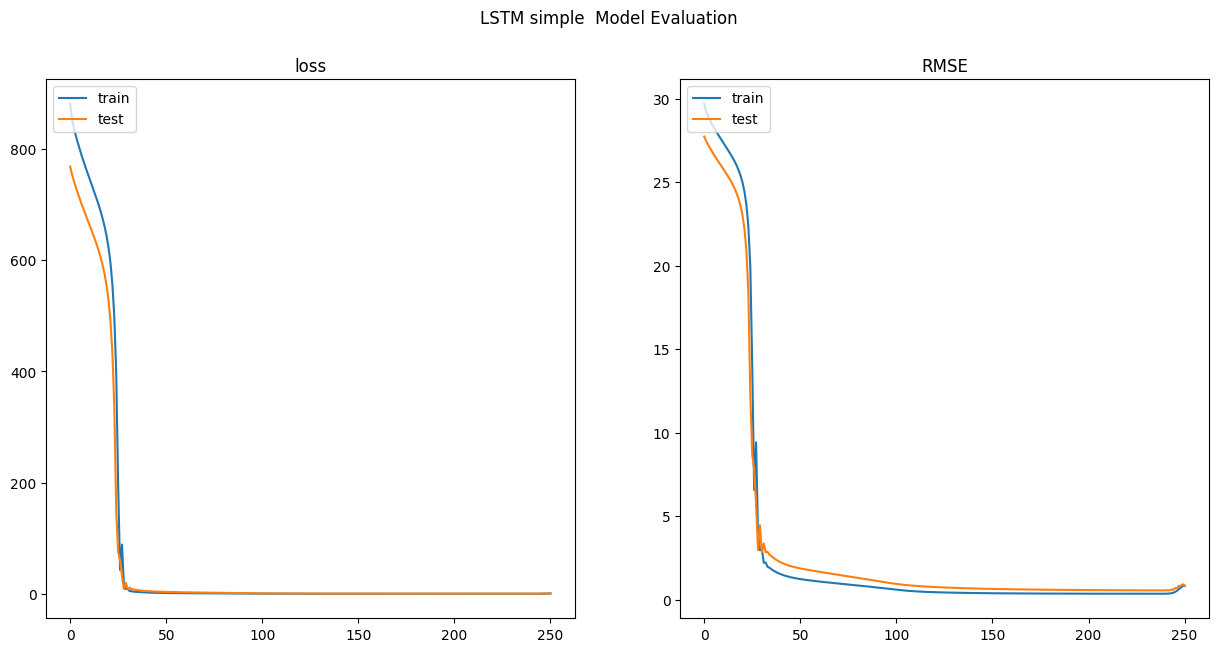

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM simple  Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history2.history['loss'])
ax1.plot(history2.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history2.history['root_mean_squared_error'])
ax2.plot(history2.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [38]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


1/1 [==============================] - 0s 208ms/step


0.852704364464608

In [39]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [40]:
model.predict(prior_days) # note the structure of the prediction

1/1 [==============================] - 0s 226ms/step


array([[23.267029]], dtype=float32)

In [41]:
tenthdaystockLSTM = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 0s 30ms/step


In [42]:
print(f"Closing price for the 10th day will be  {tenthdaystockLSTM:.2f} dollars.")

Closing price for the 10th day will be  23.27 dollars.


# LSTM with more layers

In [43]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [44]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history3 = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 8s 8s/step - loss: 612.5378 - root_mean_squared_error: 24.7495 - val_loss: 545.3726 - val_root_mean_squared_error: 23.3532
Epoch 2/600
1/1 [==============================] - 0s 65ms/step - loss: 607.6882 - root_mean_squared_error: 24.6513 - val_loss: 541.8852 - val_root_mean_squared_error: 23.2784
Epoch 3/600
1/1 [==============================] - 0s 85ms/step - loss: 604.1054 - root_mean_squared_error: 24.5786 - val_loss: 538.5739 - val_root_mean_squared_error: 23.2072
Epoch 4/600
1/1 [==============================] - 0s 91ms/step - loss: 600.7037 - root_mean_squared_error: 24.5093 - val_loss: 535.1764 - val_root_mean_squared_error: 23.1339
Epoch 5/600
1/1 [==============================] - 0s 95ms/step - loss: 597.2143 - root_mean_squared_error: 24.4380 - val_loss: 531.5872 - val_root_mean_squared_error: 23.0562
Epoch 6/600
1/1 [==============================] - 0s 81ms/step - loss: 593.5287 - root_mean_squared_error: 24.3624 - val_

1/1 [==============================] - 0s 83ms/step - loss: 329.6497 - root_mean_squared_error: 18.1563 - val_loss: 279.8982 - val_root_mean_squared_error: 16.7302
Epoch 48/600
1/1 [==============================] - 0s 66ms/step - loss: 325.5721 - root_mean_squared_error: 18.0436 - val_loss: 276.3157 - val_root_mean_squared_error: 16.6227
Epoch 49/600
1/1 [==============================] - 0s 59ms/step - loss: 321.6505 - root_mean_squared_error: 17.9346 - val_loss: 272.8944 - val_root_mean_squared_error: 16.5195
Epoch 50/600
1/1 [==============================] - 0s 66ms/step - loss: 317.8970 - root_mean_squared_error: 17.8297 - val_loss: 269.6344 - val_root_mean_squared_error: 16.4205
Epoch 51/600
1/1 [==============================] - 0s 61ms/step - loss: 314.3136 - root_mean_squared_error: 17.7289 - val_loss: 266.5261 - val_root_mean_squared_error: 16.3256
Epoch 52/600
1/1 [==============================] - 0s 59ms/step - loss: 310.8916 - root_mean_squared_error: 17.6321 - val_loss:

1/1 [==============================] - 0s 90ms/step - loss: 235.2090 - root_mean_squared_error: 15.3365 - val_loss: 196.6304 - val_root_mean_squared_error: 14.0225
Epoch 94/600
1/1 [==============================] - 0s 83ms/step - loss: 234.0031 - root_mean_squared_error: 15.2972 - val_loss: 195.5401 - val_root_mean_squared_error: 13.9836
Epoch 95/600
1/1 [==============================] - 0s 87ms/step - loss: 232.8078 - root_mean_squared_error: 15.2580 - val_loss: 194.4594 - val_root_mean_squared_error: 13.9449
Epoch 96/600
1/1 [==============================] - 0s 89ms/step - loss: 231.6228 - root_mean_squared_error: 15.2192 - val_loss: 193.3879 - val_root_mean_squared_error: 13.9064
Epoch 97/600
1/1 [==============================] - 0s 82ms/step - loss: 230.4478 - root_mean_squared_error: 15.1805 - val_loss: 192.3255 - val_root_mean_squared_error: 13.8681
Epoch 98/600
1/1 [==============================] - 0s 86ms/step - loss: 229.2825 - root_mean_squared_error: 15.1421 - val_loss:

1/1 [==============================] - 0s 90ms/step - loss: 187.6706 - root_mean_squared_error: 13.6993 - val_loss: 153.7408 - val_root_mean_squared_error: 12.3992
Epoch 140/600
1/1 [==============================] - 0s 83ms/step - loss: 186.7715 - root_mean_squared_error: 13.6664 - val_loss: 152.9329 - val_root_mean_squared_error: 12.3666
Epoch 141/600
1/1 [==============================] - 0s 101ms/step - loss: 185.8769 - root_mean_squared_error: 13.6337 - val_loss: 152.1293 - val_root_mean_squared_error: 12.3341
Epoch 142/600
1/1 [==============================] - 0s 87ms/step - loss: 184.9868 - root_mean_squared_error: 13.6010 - val_loss: 151.3298 - val_root_mean_squared_error: 12.3016
Epoch 143/600
1/1 [==============================] - 0s 100ms/step - loss: 184.1010 - root_mean_squared_error: 13.5684 - val_loss: 150.5344 - val_root_mean_squared_error: 12.2692
Epoch 144/600
1/1 [==============================] - 0s 93ms/step - loss: 183.2196 - root_mean_squared_error: 13.5359 - va

1/1 [==============================] - 0s 60ms/step - loss: 150.4168 - root_mean_squared_error: 12.2645 - val_loss: 120.4463 - val_root_mean_squared_error: 10.9748
Epoch 186/600
1/1 [==============================] - 0s 62ms/step - loss: 149.6901 - root_mean_squared_error: 12.2348 - val_loss: 119.8011 - val_root_mean_squared_error: 10.9454
Epoch 187/600
1/1 [==============================] - 0s 63ms/step - loss: 148.9666 - root_mean_squared_error: 12.2052 - val_loss: 119.1590 - val_root_mean_squared_error: 10.9160
Epoch 188/600
1/1 [==============================] - 0s 67ms/step - loss: 148.2463 - root_mean_squared_error: 12.1756 - val_loss: 118.5198 - val_root_mean_squared_error: 10.8867
Epoch 189/600
1/1 [==============================] - 0s 61ms/step - loss: 147.5291 - root_mean_squared_error: 12.1462 - val_loss: 117.8836 - val_root_mean_squared_error: 10.8574
Epoch 190/600
1/1 [==============================] - 0s 63ms/step - loss: 146.8150 - root_mean_squared_error: 12.1167 - val_

1/1 [==============================] - 0s 59ms/step - loss: 120.0096 - root_mean_squared_error: 10.9549 - val_loss: 93.6319 - val_root_mean_squared_error: 9.6764
Epoch 232/600
1/1 [==============================] - 0s 59ms/step - loss: 119.4133 - root_mean_squared_error: 10.9276 - val_loss: 93.1104 - val_root_mean_squared_error: 9.6494
Epoch 233/600
1/1 [==============================] - 0s 60ms/step - loss: 118.8197 - root_mean_squared_error: 10.9004 - val_loss: 92.5915 - val_root_mean_squared_error: 9.6224
Epoch 234/600
1/1 [==============================] - 0s 61ms/step - loss: 118.2287 - root_mean_squared_error: 10.8733 - val_loss: 92.0750 - val_root_mean_squared_error: 9.5956
Epoch 235/600
1/1 [==============================] - 0s 63ms/step - loss: 117.6403 - root_mean_squared_error: 10.8462 - val_loss: 91.5610 - val_root_mean_squared_error: 9.5688
Epoch 236/600
1/1 [==============================] - 0s 60ms/step - loss: 117.0546 - root_mean_squared_error: 10.8192 - val_loss: 91.0

Epoch 278/600
1/1 [==============================] - 0s 63ms/step - loss: 94.6571 - root_mean_squared_error: 9.7292 - val_loss: 71.6415 - val_root_mean_squared_error: 8.4641
Epoch 279/600
1/1 [==============================] - 0s 61ms/step - loss: 94.1729 - root_mean_squared_error: 9.7043 - val_loss: 71.2257 - val_root_mean_squared_error: 8.4395
Epoch 280/600
1/1 [==============================] - 0s 56ms/step - loss: 93.6909 - root_mean_squared_error: 9.6794 - val_loss: 70.8119 - val_root_mean_squared_error: 8.4150
Epoch 281/600
1/1 [==============================] - 0s 57ms/step - loss: 93.2110 - root_mean_squared_error: 9.6546 - val_loss: 70.4001 - val_root_mean_squared_error: 8.3905
Epoch 282/600
1/1 [==============================] - 0s 60ms/step - loss: 92.7333 - root_mean_squared_error: 9.6298 - val_loss: 69.9903 - val_root_mean_squared_error: 8.3660
Epoch 283/600
1/1 [==============================] - 0s 66ms/step - loss: 92.2577 - root_mean_squared_error: 9.6051 - val_loss: 69

1/1 [==============================] - 0s 106ms/step - loss: 74.0943 - root_mean_squared_error: 8.6078 - val_loss: 54.1561 - val_root_mean_squared_error: 7.3591
Epoch 326/600
1/1 [==============================] - 0s 85ms/step - loss: 73.7027 - root_mean_squared_error: 8.5850 - val_loss: 53.8270 - val_root_mean_squared_error: 7.3367
Epoch 327/600
1/1 [==============================] - 0s 83ms/step - loss: 73.3129 - root_mean_squared_error: 8.5623 - val_loss: 53.4997 - val_root_mean_squared_error: 7.3143
Epoch 328/600
1/1 [==============================] - 0s 82ms/step - loss: 72.9249 - root_mean_squared_error: 8.5396 - val_loss: 53.1740 - val_root_mean_squared_error: 7.2921
Epoch 329/600
1/1 [==============================] - 0s 86ms/step - loss: 72.5386 - root_mean_squared_error: 8.5170 - val_loss: 52.8500 - val_root_mean_squared_error: 7.2698
Epoch 330/600
1/1 [==============================] - 0s 95ms/step - loss: 72.1542 - root_mean_squared_error: 8.4944 - val_loss: 52.5276 - val_r

1/1 [==============================] - 0s 60ms/step - loss: 57.5282 - root_mean_squared_error: 7.5847 - val_loss: 40.4051 - val_root_mean_squared_error: 6.3565
Epoch 373/600
1/1 [==============================] - 0s 63ms/step - loss: 57.2142 - root_mean_squared_error: 7.5640 - val_loss: 40.1484 - val_root_mean_squared_error: 6.3363
Epoch 374/600
1/1 [==============================] - 0s 60ms/step - loss: 56.9018 - root_mean_squared_error: 7.5433 - val_loss: 39.8930 - val_root_mean_squared_error: 6.3161
Epoch 375/600
1/1 [==============================] - 0s 67ms/step - loss: 56.5909 - root_mean_squared_error: 7.5227 - val_loss: 39.6390 - val_root_mean_squared_error: 6.2959
Epoch 376/600
1/1 [==============================] - 0s 70ms/step - loss: 56.2814 - root_mean_squared_error: 7.5021 - val_loss: 39.3863 - val_root_mean_squared_error: 6.2759
Epoch 377/600
1/1 [==============================] - 0s 66ms/step - loss: 55.9735 - root_mean_squared_error: 7.4815 - val_loss: 39.1351 - val_ro

1/1 [==============================] - 0s 67ms/step - loss: 44.3154 - root_mean_squared_error: 6.6570 - val_loss: 29.7578 - val_root_mean_squared_error: 5.4551
Epoch 420/600
1/1 [==============================] - 0s 69ms/step - loss: 44.0666 - root_mean_squared_error: 6.6383 - val_loss: 29.5609 - val_root_mean_squared_error: 5.4370
Epoch 421/600
1/1 [==============================] - 0s 87ms/step - loss: 43.8190 - root_mean_squared_error: 6.6196 - val_loss: 29.3651 - val_root_mean_squared_error: 5.4190
Epoch 422/600
1/1 [==============================] - 0s 100ms/step - loss: 43.5726 - root_mean_squared_error: 6.6010 - val_loss: 29.1704 - val_root_mean_squared_error: 5.4010
Epoch 423/600
1/1 [==============================] - 0s 112ms/step - loss: 43.3275 - root_mean_squared_error: 6.5824 - val_loss: 28.9769 - val_root_mean_squared_error: 5.3830
Epoch 424/600
1/1 [==============================] - 0s 93ms/step - loss: 43.0836 - root_mean_squared_error: 6.5638 - val_loss: 28.7846 - val_

1/1 [==============================] - 0s 63ms/step - loss: 33.9017 - root_mean_squared_error: 5.8225 - val_loss: 21.6691 - val_root_mean_squared_error: 4.6550
Epoch 467/600
1/1 [==============================] - 0s 61ms/step - loss: 33.7069 - root_mean_squared_error: 5.8058 - val_loss: 21.5212 - val_root_mean_squared_error: 4.6391
Epoch 468/600
1/1 [==============================] - 0s 62ms/step - loss: 33.5131 - root_mean_squared_error: 5.7890 - val_loss: 21.3742 - val_root_mean_squared_error: 4.6232
Epoch 469/600
1/1 [==============================] - 0s 64ms/step - loss: 33.3203 - root_mean_squared_error: 5.7724 - val_loss: 21.2282 - val_root_mean_squared_error: 4.6074
Epoch 470/600
1/1 [==============================] - 0s 63ms/step - loss: 33.1286 - root_mean_squared_error: 5.7557 - val_loss: 21.0831 - val_root_mean_squared_error: 4.5916
Epoch 471/600
1/1 [==============================] - 0s 74ms/step - loss: 32.9379 - root_mean_squared_error: 5.7392 - val_loss: 20.9389 - val_ro

1/1 [==============================] - 0s 97ms/step - loss: 25.8012 - root_mean_squared_error: 5.0795 - val_loss: 15.6625 - val_root_mean_squared_error: 3.9576
Epoch 514/600
1/1 [==============================] - 0s 88ms/step - loss: 25.6508 - root_mean_squared_error: 5.0647 - val_loss: 15.5542 - val_root_mean_squared_error: 3.9439
Epoch 515/600
1/1 [==============================] - 0s 69ms/step - loss: 25.5012 - root_mean_squared_error: 5.0499 - val_loss: 15.4466 - val_root_mean_squared_error: 3.9302
Epoch 516/600
1/1 [==============================] - 0s 96ms/step - loss: 25.3525 - root_mean_squared_error: 5.0351 - val_loss: 15.3398 - val_root_mean_squared_error: 3.9166
Epoch 517/600
1/1 [==============================] - 0s 84ms/step - loss: 25.2046 - root_mean_squared_error: 5.0204 - val_loss: 15.2337 - val_root_mean_squared_error: 3.9030
Epoch 518/600
1/1 [==============================] - 0s 96ms/step - loss: 25.0575 - root_mean_squared_error: 5.0057 - val_loss: 15.1284 - val_ro

1/1 [==============================] - 0s 82ms/step - loss: 19.5890 - root_mean_squared_error: 4.4259 - val_loss: 11.3226 - val_root_mean_squared_error: 3.3649
Epoch 561/600
1/1 [==============================] - 0s 88ms/step - loss: 19.4745 - root_mean_squared_error: 4.4130 - val_loss: 11.2457 - val_root_mean_squared_error: 3.3535
Epoch 562/600
1/1 [==============================] - 0s 68ms/step - loss: 19.3608 - root_mean_squared_error: 4.4001 - val_loss: 11.1693 - val_root_mean_squared_error: 3.3421
Epoch 563/600
1/1 [==============================] - 0s 66ms/step - loss: 19.2477 - root_mean_squared_error: 4.3872 - val_loss: 11.0935 - val_root_mean_squared_error: 3.3307
Epoch 564/600
1/1 [==============================] - 0s 65ms/step - loss: 19.1352 - root_mean_squared_error: 4.3744 - val_loss: 11.0184 - val_root_mean_squared_error: 3.3194
Epoch 565/600
1/1 [==============================] - 0s 65ms/step - loss: 19.0235 - root_mean_squared_error: 4.3616 - val_loss: 10.9437 - val_ro

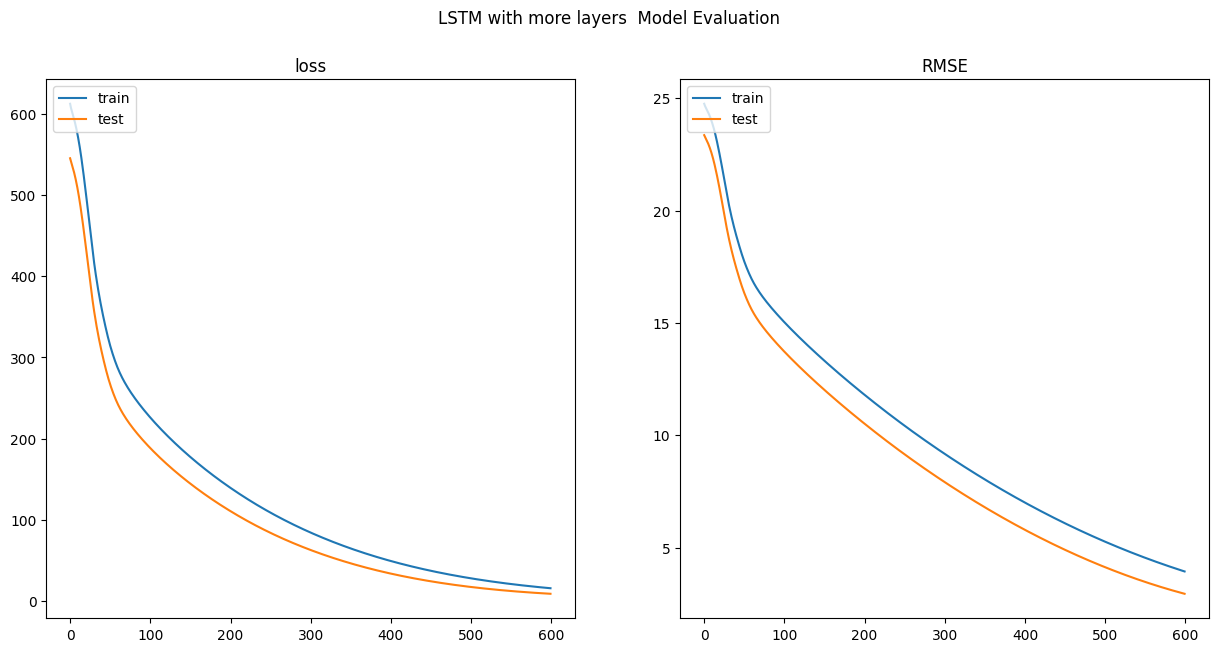

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM with more layers  Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history3.history['loss'])
ax1.plot(history3.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history3.history['root_mean_squared_error'])
ax2.plot(history3.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [47]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


1/1 [==============================] - 1s 1s/step


2.944862037910039

In [48]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [49]:
tenthdaystockLSTM_more = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 1s 1s/step


In [50]:
print(f"Closing price for the 10th day will be  {tenthdaystockLSTM_more:.2f} dollars.")

Closing price for the 10th day will be  21.26 dollars.


# GRU (with more layers)

In [51]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [52]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history4 = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 5s 5s/step - loss: 655.0271 - root_mean_squared_error: 25.5935 - val_loss: 575.1371 - val_root_mean_squared_error: 23.9820
Epoch 2/600
1/1 [==============================] - 0s 74ms/step - loss: 642.0714 - root_mean_squared_error: 25.3391 - val_loss: 566.4392 - val_root_mean_squared_error: 23.8000
Epoch 3/600
1/1 [==============================] - 0s 76ms/step - loss: 632.5242 - root_mean_squared_error: 25.1500 - val_loss: 558.1346 - val_root_mean_squared_error: 23.6249
Epoch 4/600
1/1 [==============================] - 0s 82ms/step - loss: 623.4495 - root_mean_squared_error: 24.9690 - val_loss: 549.7236 - val_root_mean_squared_error: 23.4462
Epoch 5/600
1/1 [==============================] - 0s 78ms/step - loss: 614.4480 - root_mean_squared_error: 24.7881 - val_loss: 540.8723 - val_root_mean_squared_error: 23.2567
Epoch 6/600
1/1 [==============================] - 0s 83ms/step - loss: 604.7432 - root_mean_squared_error: 24.5915 - val_

Epoch 48/600
1/1 [==============================] - 0s 69ms/step - loss: 0.3386 - root_mean_squared_error: 0.5819 - val_loss: 0.1364 - val_root_mean_squared_error: 0.3693
Epoch 49/600
1/1 [==============================] - 0s 67ms/step - loss: 0.2562 - root_mean_squared_error: 0.5061 - val_loss: 0.1014 - val_root_mean_squared_error: 0.3184
Epoch 50/600
1/1 [==============================] - 0s 66ms/step - loss: 0.2048 - root_mean_squared_error: 0.4526 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2887
Epoch 51/600
1/1 [==============================] - 0s 68ms/step - loss: 0.1754 - root_mean_squared_error: 0.4188 - val_loss: 0.0753 - val_root_mean_squared_error: 0.2744
Epoch 52/600
1/1 [==============================] - 0s 63ms/step - loss: 0.1596 - root_mean_squared_error: 0.3995 - val_loss: 0.0725 - val_root_mean_squared_error: 0.2692
Epoch 53/600
1/1 [==============================] - 0s 64ms/step - loss: 0.1516 - root_mean_squared_error: 0.3893 - val_loss: 0.0719 - val_root_m

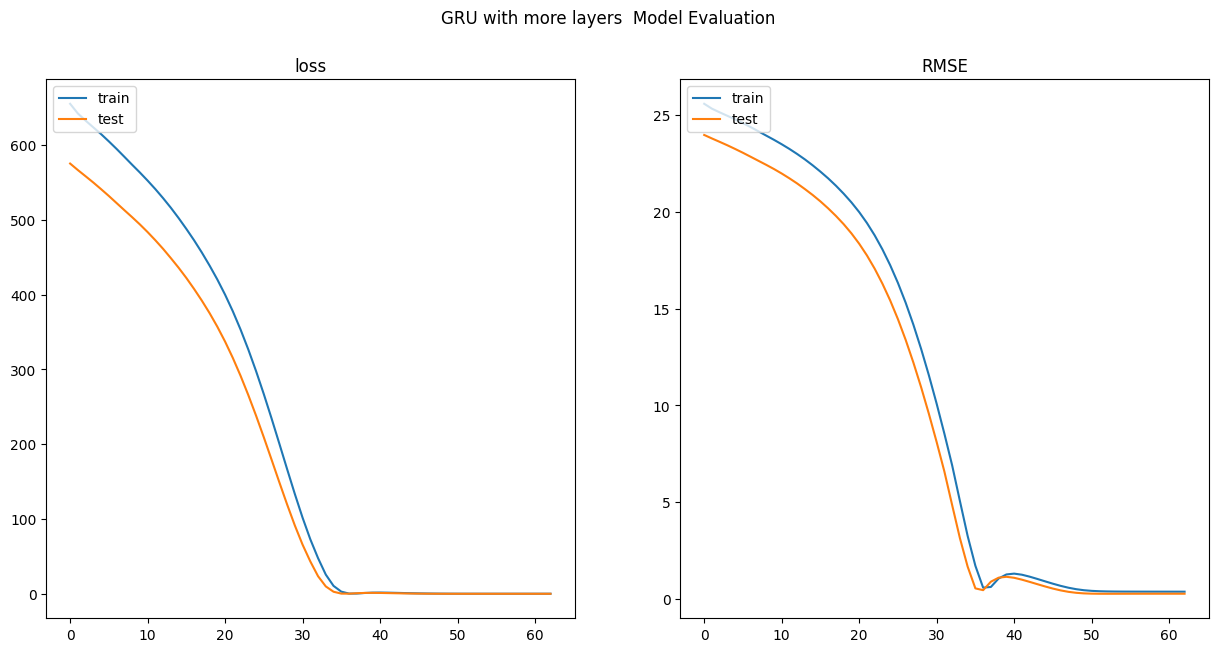

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU with more layers  Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history4.history['loss'])
ax1.plot(history4.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history4.history['root_mean_squared_error'])
ax2.plot(history4.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [55]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5

1/1 [==============================] - 0s 423ms/step


0.27103026389490964

In [56]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [57]:
tenthdaystock_gru = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 0s 475ms/step


In [58]:
print(f"Closing price for the 10th day will be  {tenthdaystock_gru:.2f} dollars.")

Closing price for the 10th day will be  24.16 dollars.


# Conv1D

In [59]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [60]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history5 = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
1/1 [==============================] - 12s 12s/step - loss: 665.9366 - root_mean_squared_error: 25.8057 - val_loss: 567.6524 - val_root_mean_squared_error: 23.8255
Epoch 2/600
1/1 [==============================] - 0s 53ms/step - loss: 629.9743 - root_mean_squared_error: 25.0993 - val_loss: 542.1210 - val_root_mean_squared_error: 23.2835
Epoch 3/600
1/1 [==============================] - 0s 55ms/step - loss: 600.8658 - root_mean_squared_error: 24.5126 - val_loss: 517.3004 - val_root_mean_squared_error: 22.7442
Epoch 4/600
1/1 [==============================] - 0s 58ms/step - loss: 572.4513 - root_mean_squared_error: 23.9260 - val_loss: 492.1479 - val_root_mean_squared_error: 22.1844
Epoch 5/600
1/1 [==============================] - 0s 57ms/step - loss: 543.9080 - root_mean_squared_error: 23.3218 - val_loss: 466.7196 - val_root_mean_squared_error: 21.6037
Epoch 6/600
1/1 [==============================] - 0s 60ms/step - loss: 515.5090 - root_mean_squared_error: 22.7048 - va

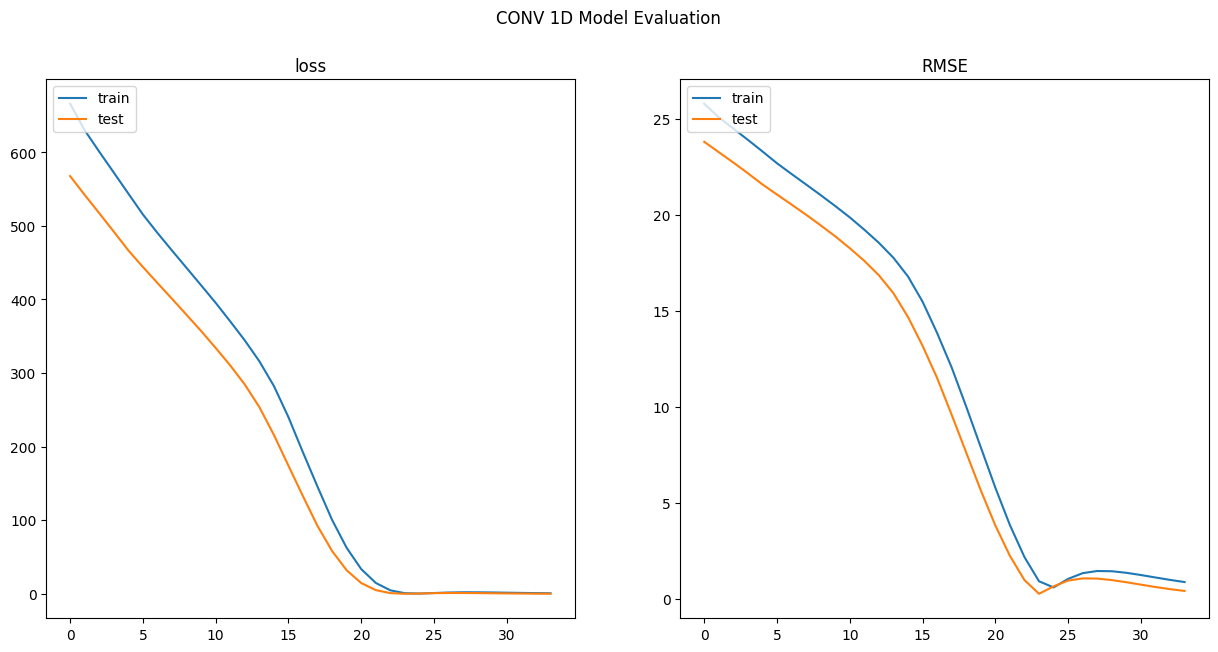

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('CONV 1D Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history5.history['loss'])
ax1.plot(history5.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history5.history['root_mean_squared_error'])
ax2.plot(history5.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


1/1 [==============================] - 1s 973ms/step


0.4119059583902242

In [64]:
prior_days = np.array(
    [
        23,25,26,22,22,27,24,23,26,
    ]
)

# reshape into the three dimensions for input into model
prior_days = prior_days.reshape(1, 9, 1) # 1 row, 9 time steps (features), and 1 output/prediction)

In [65]:
tenthdaystock_Conv1D = model.predict(prior_days)[0][0] # we see the predicted temp is embedded inside two dimensions

1/1 [==============================] - 1s 940ms/step


In [66]:
print(f"Closing price for the 10th day will be  {tenthdaystock_Conv1D:.2f} dollars.")

Closing price for the 10th day will be  24.70 dollars.


## Ineference

# Dataset/Stock description : I have choosen the NCR corporation stock data and I took the the data range from 11/28/2022 to 4/20/2023

## Root Mean squatre Error for all the models

### Simple RNN  : 1.9539275000956868
### Deep RNN    : 0.6176489669262625
### LSTM with One layer : 0.852704364464608
### LSTM with More layers : 2.944862037910039
### GRU (with more layers) : 0.27103026389490964
### Conv1D : 0.4119059583902242

## So from the above values we can see that GRU with more layers is performing well and it is the best model for my data set
